In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [21]:
iris = load_iris()
X = iris.data[:, :1]  # Only one feature (first column)
y = iris.target  # Target labels

# Binary classification: Let's filter for class 0 and class 1 (versicolor and setosa)
X = X[y != 2]
y = y[y != 2]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


Confusion Matrix:
[[8 4]
 [0 8]]
Accuracy: 0.8000
Precision: 0.6667
Recall: 1.0000
MSE: 0.2000
RMSE: 0.4472


In [26]:
new_data = np.array([[0.5]])
new_data_scaled = scaler.transform(new_data)
new_pred = model.predict(new_data_scaled)
print(f"predicted class:{new_pred}")

predicted class:[0]


In [ ]:
x_min, x_max = X_train.min() -1, X_train.max() +1
xx = np.arange(x_min, x_max, 0.01).reshape(-1,1)
probs = model.predict_proba(xx)[:,1]


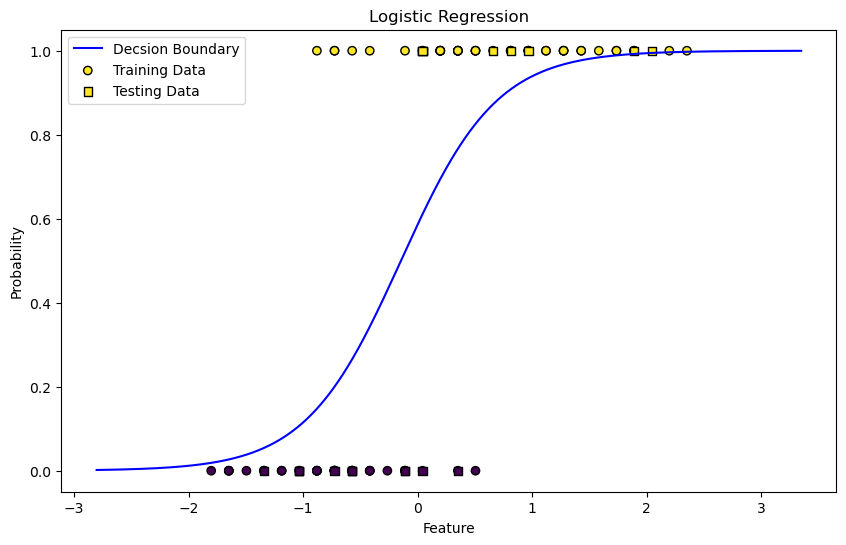

In [33]:
plt.figure(figsize=(10,6))
plt.plot(xx, probs, label="Decsion Boundary", color="blue")
plt.scatter(X_train, y_train,c=y_train, marker="o", edgecolor="k", label="Training Data")
plt.scatter(X_test, y_test,c=y_test, marker="s", edgecolor="k", label="Testing Data")
plt.legend()
plt.title("Logistic Regression")
plt.xlabel("Feature")
plt.ylabel("Probability")
plt.show()